In [11]:
import joblib
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from pytorchyolo.models import load_model

from minepsilon import yf_det_fn as yf_detect_faces
from minepsilon import mp_det_fn as mp_detect_faces
from minepsilon import yn_det_fn as yn_detect_faces

from generate_perturbation import pipeline
from extract_image_mask import create_mask

The model does not exist in ./ptlabel_best_model.pth or is not a file


In [12]:
import pandas as pd

In [13]:
FILENAME = 'ths-st3 compiled dataset.csv'
df = pd.read_csv(FILENAME)

In [14]:
def generate_fgsm_features(dataframe):
    for i in range(18):
        df['hsv_h_' + str(i)] =  df['H_HSV_BIN_bbox_' + str(2 * i)] + df['H_HSV_BIN_bbox_' + str(2 * i + 1)]
    df['area'] = df['w'] * df['h']
    return df

In [19]:
df = generate_fgsm_features(df)
df

,path,source_w,source_h,face_index,obj_score,class_score,x1,y1,x2,y2,...,hsv_h_9,hsv_h_10,hsv_h_11,hsv_h_12,hsv_h_13,hsv_h_14,hsv_h_15,hsv_h_16,hsv_h_17,area
0,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,683,1024,75,0.531384,0.999730,339,207,346,215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000416
1,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,899,1024,41,0.963016,0.999830,200,95,205,102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000277
2,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,23,0.953876,0.999671,116,214,120,220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000202
3,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,21,0.993056,0.999989,149,182,158,191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000578
4,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,1,0.930012,0.999633,380,252,383,257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,233,191,0,0.999565,0.999897,131,101,300,376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271126
24814,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,500,366,0,0.999923,0.999958,139,120,291,340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195388
24815,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,337,286,0,0.999941,0.999918,122,65,301,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254831
24816,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,235,215,0,0.999938,0.999973,122,97,272,307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184108


In [125]:
import os
filenames = []
for path in df['path']:
    filenames.append(os.path.basename(path))
df['filename'] = filenames
df

,path,source_w,source_h,face_index,obj_score,class_score,x1,y1,x2,y2,...,hsv_h_10,hsv_h_11,hsv_h_12,hsv_h_13,hsv_h_14,hsv_h_15,hsv_h_16,hsv_h_17,area,filename
0,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,683,1024,75,0.531384,0.999730,339,207,346,215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000416,0_Parade_marchingband_1_141.jpg
1,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,899,1024,41,0.963016,0.999830,200,95,205,102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000277,0_Parade_marchingband_1_164.jpg
2,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,23,0.953876,0.999671,116,214,120,220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000202,0_Parade_marchingband_1_220.jpg
3,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,21,0.993056,0.999989,149,182,158,191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000578,0_Parade_marchingband_1_258.jpg
4,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,1,0.930012,0.999633,380,252,383,257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000139,0_Parade_marchingband_1_363.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,233,191,0,0.999565,0.999897,131,101,300,376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271126,009970.jpg
24814,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,500,366,0,0.999923,0.999958,139,120,291,340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195388,009974.jpg
24815,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,337,286,0,0.999941,0.999918,122,65,301,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254831,009992.jpg
24816,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,235,215,0,0.999938,0.999973,122,97,272,307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184108,009997.jpg


In [218]:
def get_gaussian_features():
    features = ['w', 'h']
    for i in range(18):
        features.append('hsv_h_' + str(i))
    
    for i in range(26):
        features.append('S_HSV_BIN_bbox_' + str(i))
        
    for i in range(26):
        features.append('V_HSV_BIN_bbox_' + str(i))
    
    for i in range(26):
        features.append('LBP_BIN_bbox_' + str(i))
    
    return features

def generate_gaussian(image, model, series):
    noisy_img = image.astype('float64')
    
    features = series[get_gaussian_features()]
    print(features.columns)
    x1, y1, x2, y2 = int(series['x1']), int(series['y1']), int(series['x2']), int(series['y2'])
    print(x1, y1, x2, y2 )
    #create the gaussian noise
    np.random.seed(0)
    sigma = model.predict(features)
    print(sigma)
    gaussian = np.random.normal(0, sigma, (y2-y1, x2-x1, 3)) 

    #add gaussian noise to the img
    noisy_img[y1:y2, x1:x2, :] = noisy_img[y1:y2, x1:x2, :] + gaussian

    # remove values that are <-1 and >255
    noisy_img = np.where(noisy_img < 0, 0, noisy_img)
    noisy_img = np.where(noisy_img > 255, 255, noisy_img)

    #convert img back to uint
    noisy_img = noisy_img.astype('uint8')
    return noisy_img

In [219]:
def generate_fgsm(img_path, model, face_index):
    create_mask(img_path)
    image = pipeline(img_path, model, 'HSV', 0, 1, face_index)
    return image

In [220]:
def resize_image(image, target_size, pad_color):
    height, width, _ = image.shape
    target_height, target_width = target_size

    # Check if resizing is necessary
    if height > target_height or width > target_width:
        # Calculate the aspect ratio
        aspect_ratio = width / float(height)
        
        # Calculate the new dimensions while maintaining the aspect ratio
        if aspect_ratio > 1:
            new_width = target_width
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = target_height
            new_width = int(new_height * aspect_ratio)

        # Resize the image
        resized_image = cv2.resize(image, (new_width, new_height))
    else:
        resized_image = image

    # Create a blank canvas of the target size
    canvas = np.full((target_height, target_width, 3), pad_color, dtype=np.uint8)

    # Calculate the padding
    pad_height = max(0, target_height - resized_image.shape[0])
    pad_width = max(0, target_width - resized_image.shape[1])

    # Calculate the amount of padding on each side
    top_pad = pad_height // 2
    bottom_pad = pad_height - top_pad
    left_pad = pad_width // 2
    right_pad = pad_width - left_pad

    # Pad the resized image on the blank canvas
    canvas[top_pad:target_height - bottom_pad, left_pad:target_width - right_pad, :] = resized_image

    return canvas

In [221]:
def crop_padding_coordinates(image):
    # Find the non-zero pixels in the image
    non_zero_pixels = cv2.findNonZero(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    
    # Get the bounding rectangle
    x, y, w, h = cv2.boundingRect(non_zero_pixels)
    
    return x, y, w, h

In [222]:
def crop_padding(image, x, y, w, h):
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

In [223]:
# import joblib 
gaussian_model = joblib.load("gaussian_mpr.pkl")
# fgsm_model = joblib.load("file.pkl")

In [224]:
path = r"0_Parade_marchingband_1_141.jpg"
labels = ["A", "B", "C", "D"]
order = ['image', 'fgsm_model', 'fgsm_naive', 'gaussian']

0 69 416 277
0 69 416 277
0 69 416 277
0 69 416 277
Index(['w', 'h', 'hsv_h_0', 'hsv_h_1', 'hsv_h_2', 'hsv_h_3', 'hsv_h_4',
       'hsv_h_5', 'hsv_h_6', 'hsv_h_7', 'hsv_h_8', 'hsv_h_9', 'hsv_h_10',
       'hsv_h_11', 'hsv_h_12', 'hsv_h_13', 'hsv_h_14', 'hsv_h_15', 'hsv_h_16',
       'hsv_h_17', 'S_HSV_BIN_bbox_0', 'S_HSV_BIN_bbox_1', 'S_HSV_BIN_bbox_2',
       'S_HSV_BIN_bbox_3', 'S_HSV_BIN_bbox_4', 'S_HSV_BIN_bbox_5',
       'S_HSV_BIN_bbox_6', 'S_HSV_BIN_bbox_7', 'S_HSV_BIN_bbox_8',
       'S_HSV_BIN_bbox_9', 'S_HSV_BIN_bbox_10', 'S_HSV_BIN_bbox_11',
       'S_HSV_BIN_bbox_12', 'S_HSV_BIN_bbox_13', 'S_HSV_BIN_bbox_14',
       'S_HSV_BIN_bbox_15', 'S_HSV_BIN_bbox_16', 'S_HSV_BIN_bbox_17',
       'S_HSV_BIN_bbox_18', 'S_HSV_BIN_bbox_19', 'S_HSV_BIN_bbox_20',
       'S_HSV_BIN_bbox_21', 'S_HSV_BIN_bbox_22', 'S_HSV_BIN_bbox_23',
       'S_HSV_BIN_bbox_24', 'S_HSV_BIN_bbox_25', 'V_HSV_BIN_bbox_0',
       'V_HSV_BIN_bbox_1', 'V_HSV_BIN_bbox_2', 'V_HSV_BIN_bbox_3',
       'V_HSV_BIN_bbox_4'

E:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


ValueError: scale < 0

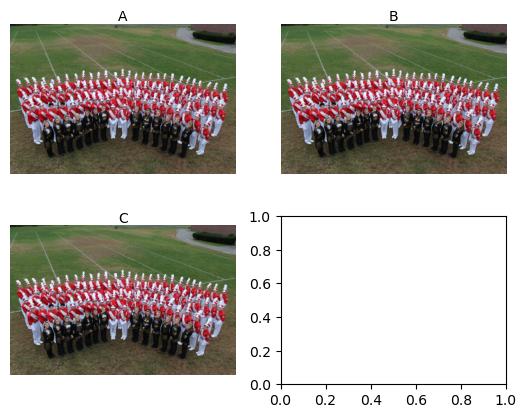

In [225]:
series = df[df['filename'] == path]

fig, axs = plt.subplots(2, 2)
# Iterate over the image paths and display images in subplots
for i, image_type in enumerate(order):
    # Read the image
    image = plt.imread(path)
    pad_image = resize_image(image, (416, 416), 0)
    x, y, w, h = crop_padding_coordinates(pad_image)
    print(x, y, w, h)
    row = i // 2
    col = i % 2
    
    if (image_type == 'image'):
        result_image = crop_padding(pad_image, x, y, w, h)
#     elif (image_type == 'fgsm_model'):
#         image = generate_fgsm(img_path, model, face_index)
#     elif (image_type == 'fgsm_naive'):
#         image = generate_naive(fgsm_path, model, face_index)
    elif (image_type == 'gaussian'):
        image = generate_gaussian(pad_image, gaussian_model, series)
#     else:
#         raise Exception("Invalid Order")
    
    # Display the image in the corresponding subplot
    axs[row, col].imshow(result_image)
    axs[row, col].axis("off")  # Optionally turn off axis labels

    axs[row, col].set_title(labels[i], fontsize=10, pad=0)
    
# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
size_order = ['L', 'S', 'M', 'S', 'L', 'M', 'M', 'S', 'L']